In [55]:
#from sodapy import Socrata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import app_token
from config import password
from functions import clean

In [2]:
# client = Socrata("data.austintexas.gov",
#                 app_token,
#                 username="joseph.w.grantham@gmail.com",
#                 password=password)

# outcome = "9t4d-g238"
# intake = "wter-evkm"

In [3]:
ifile1 = '../Resources/aac_intakes_outcomes.csv'
ifile2 = '../Resources/aac_outcomes.csv'
ifile3 = '../Resources/aac_intakes.csv'

io_df = pd.read_csv(ifile1)
o_df = pd.read_csv(ifile2)
i_df = pd.read_csv(ifile3)

In [4]:
# results1 = client.get(outcome, limit = 100)
# results2 = client.get(intake, limit = 100)

# intake_df = pd.DataFrame(results2)
# outcome_df = pd.DataFrame(results1)

# intake_df.head()

In [5]:
#intake_df['found_location'].value_counts()

In [6]:
def change_age(i):
    j = i.split(" ")
    if (j[1] == "months" or j[1] == "month"):
        i = int(j[0])/12
    if (j[1] == 'weeks' or j[1] == 'week'):
        i = int(j[0])/52
    if (j[1] == 'years' or j[1] == 'year'):
        i = int(j[0])
    return i

In [7]:
# intake_df['age_upon_intake'] = intake_df['age_upon_intake'].apply(change_age)

In [8]:
# def set_address(i):
#     j = i.split(' ')
#     try:
#         n = int(i[0])
#         address = ''
#         j.remove('(TX)')
#         j.remove('in')
#         j.remove('Austin')
#         for x in j:
#             address = address + x + ' '
#         address = address + 'Austin, TX'
#     except:
#         address = i
#     finally:
#         return address
        
    

In [9]:
# jfjf = '1902 Gentilly in Austin (TX)'

In [10]:
# set_address(jfjf)

In [11]:
# intake_df['found_location'].apply(set_address)

In [12]:
# def contains(i):
#     return ',' in i

In [13]:
# intake_df['found_location'].apply(contains)

In [14]:
# contains(str)

In [15]:
# str = "Austin (TX)"

In [16]:
#io_df_sample = io_df.sample(500)

In [17]:
df1 = io_df.groupby('outcome_type')

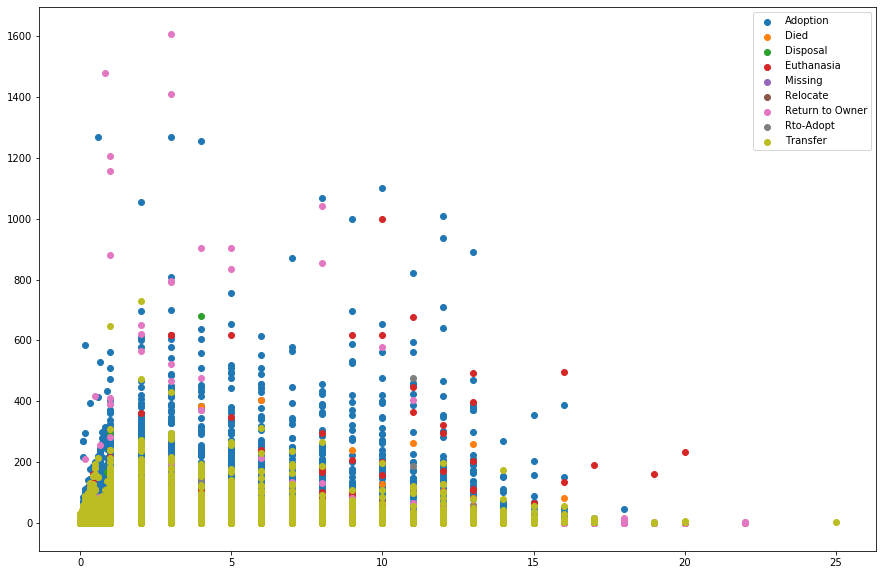

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

for name,group in df1:
    ax.scatter(group['age_upon_outcome_(years)'],group['time_in_shelter_days'],label=name)
ax.legend()

In [19]:
i_df.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


In [20]:
columns = [
    'breed',
    'animal_id',
    'found_location'
]

dogs = i_df.loc[i_df['animal_type'] == 'Dog', columns]

In [21]:
dogs['breed'].value_counts()

Pit Bull Mix                                 6382
Chihuahua Shorthair Mix                      4860
Labrador Retriever Mix                       4841
German Shepherd Mix                          1963
Australian Cattle Dog Mix                    1105
Dachshund Mix                                 813
Boxer Mix                                     689
Border Collie Mix                             667
Miniature Poodle Mix                          662
Catahoula Mix                                 484
Australian Shepherd Mix                       470
Rat Terrier Mix                               469
Yorkshire Terrier Mix                         449
Siberian Husky Mix                            442
Jack Russell Terrier Mix                      437
Miniature Schnauzer Mix                       404
Beagle Mix                                    394
Staffordshire Mix                             385
Chihuahua Longhair Mix                        371
Cairn Terrier Mix                             350


In [22]:
dogs.head()

,breed,animal_id,found_location
0,English Springer Spaniel,A706918,9409 Bluegrass Dr in Austin (TX)
1,Basenji Mix,A724273,2818 Palomino Trail in Austin (TX)
3,Doberman Pinsch/Australian Cattle Dog,A682524,800 Grove Blvd in Austin (TX)
4,Labrador Retriever Mix,A743852,Austin (TX)
5,Labrador Retriever Mix,A708452,Austin (TX)


In [23]:
def sep_breeds(i):
    breed = i
    if '/' in i:
        j = breed.split('/')
        print(j[0])
        breed = j[0] + ' Mix'
    return breed

In [24]:
sep_breeds('Australian Cattle Dog/Treeing Walker Coonhound ')

Australian Cattle Dog


'Australian Cattle Dog Mix'

In [25]:
breed = 'Australian Cattle Dog/Treeing Walker Coonhound'
i = breed.split('/')
i[0]

'Australian Cattle Dog'

In [26]:
dogs['breed'] = dogs['breed'].apply(sep_breeds)

Doberman Pinsch
Australian Cattle Dog
Dachshund
German Shepherd
Feist
Chihuahua Shorthair
Boston Terrier
German Shepherd
Miniature Schnauzer
Labrador Retriever
Labrador Retriever
Labrador Retriever
Dachshund
Rottweiler
Basenji
Pit Bull
Shih Tzu
Labrador Retriever
Miniature Pinscher
Rhod Ridgeback
Mastiff
Dachshund Wirehair
Labrador Retriever
Australian Cattle Dog
Chihuahua Longhair
Dachshund
Labrador Retriever
German Shepherd
Pit Bull
German Shepherd
Labrador Retriever
Australian Cattle Dog
Tibetan Spaniel
Labrador Retriever
Australian Cattle Dog
German Shepherd
Chihuahua Shorthair
Border Terrier
Rat Terrier
Labrador Retriever
Labrador Retriever
Pit Bull
Chow Chow
Border Collie
Black
Chihuahua Shorthair
Chihuahua Shorthair
Pit Bull
Labrador Retriever
Norwich Terrier
Bichon Frise
Labrador Retriever
Dachshund
Beagle
Pit Bull
Cairn Terrier
Jack Russell Terrier
Flat Coat Retriever
Dachshund
Beagle
Basset Hound
Border Collie
Boxer
Pit Bull
Labrador Retriever
German Shepherd
Border Collie
Vi

Chihuahua Shorthair
American Staffordshire Terrier
Dachshund
Welsh Terrier
Beagle
German Shepherd
Black Mouth Cur
Labrador Retriever
Labrador Retriever
Labrador Retriever
Catahoula
Chihuahua Longhair
Chihuahua Shorthair
Jack Russell Terrier
Labrador Retriever
Chihuahua Shorthair
Greyhound
Miniature Poodle
Australian Cattle Dog
Labrador Retriever
Jack Russell Terrier
Anatol Shepherd
Jack Russell Terrier
Boston Terrier
Australian Cattle Dog
Parson Russell Terrier
Collie Smooth
Miniature Pinscher
Beagle
Chihuahua Shorthair
Chihuahua Longhair
Labrador Retriever
Catahoula
Labrador Retriever
Labrador Retriever
Toy Poodle
Border Collie
Anatol Shepherd
Labrador Retriever
Labrador Retriever
Labrador Retriever
Labrador Retriever
Maltese
Labrador Retriever
Pug
Silky Terrier
Miniature Poodle
German Shepherd
Dachshund Wirehair
Labrador Retriever
Boxer
Pit Bull
Siberian Husky
Labrador Retriever
Cairn Terrier
Labrador Retriever
Australian Cattle Dog
Australian Shepherd
Beagle
German Shepherd
American

Border Terrier
Pit Bull
Dachshund
Border Collie
Pit Bull
Siberian Husky
West Highland
Border Terrier
Labrador Retriever
Siberian Husky
Beagle
Chihuahua Shorthair
Boxer
Border Collie
Labrador Retriever
Labrador Retriever
Black
American Bulldog
Labrador Retriever
Pit Bull
Labrador Retriever
Pit Bull
Chihuahua Shorthair
Great Pyrenees
Labrador Retriever
Jack Russell Terrier
St. Bernard Rough Coat
German Shepherd
Pit Bull
Dachshund
Cardigan Welsh Corgi
Border Collie
Irish Setter
Anatol Shepherd
Pembroke Welsh Corgi
German Shepherd
Dachshund Wirehair
Labrador Retriever
Dachshund
Dachshund
Vizsla
Australian Cattle Dog
Dachshund Wirehair
Border Collie
Collie Rough
Rottweiler
Chihuahua Shorthair
Beagle
Chihuahua Shorthair
Dachshund
Labrador Retriever
Labrador Retriever
Labrador Retriever
Chihuahua Shorthair
Bruss Griffon
Chihuahua Shorthair
Pit Bull
Pointer
Labrador Retriever
Anatol Shepherd
Labrador Retriever
Labrador Retriever
Rat Terrier
Chihuahua Shorthair
Boxer
Irish Terrier
Beagle
Doberm

Australian Shepherd
Australian Shepherd
Labrador Retriever
Labrador Retriever
Shih Tzu
German Shepherd
Black
American Bulldog
American Bulldog
American Bulldog
German Shepherd
Beagle
Miniature Poodle
Dachshund Wirehair
German Shepherd
Chihuahua Shorthair


In [93]:
df2 = dogs['breed'].value_counts()

In [28]:
top20 = df2.index[:20]

In [29]:
dogs_20 = pd.DataFrame({
    'breed':[],
    'animal_id':[]
})
for i in top20:
    df3 = dogs.loc[dogs['breed'] == i]
    #print(df3.head())
    dogs_20 = dogs_20.append(df3)

C:\Apps\Anaconda\envs\pythondata\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [30]:
io_df = io_df.rename(columns ={
    'animal_id_outcome':'animal_id'
})


dogs_20.head()

,animal_id,breed,found_location
28,A700396,Pit Bull Mix,4200 Smith School Rd in Austin (TX)
62,A676263,Pit Bull Mix,Elfen Way in Austin (TX)
94,A740584,Pit Bull Mix,20412 Keilman Ln in Travis (TX)
120,A687473,Pit Bull Mix,16403 Summit in Travis (TX)
131,A664941,Pit Bull Mix,Webberville Road & East 12Th Street in Austin ...


In [67]:
df4 = dogs_20.merge(io_df, on='animal_id',how='inner')
df5 = df4
df5['outcome_type'] = df4['outcome_type'].apply(clean)
df5.head()

,animal_id,breed_x,found_location_x,age_upon_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,A700396,Pit Bull Mix,4200 Smith School Rd in Austin (TX),4 years,2012-04-13 00:00:00,NaN,Positive Outcome,Spayed Female,1460,4.0,...,"(2.5, 5.0]",2016-09-20 18:35:00,9,2016,2016-09,Tuesday,18,1.0,74 days 19:03:00.000000000,74.793750
1,A700396,Pit Bull Mix,4200 Smith School Rd in Austin (TX),3 years,2012-04-13 00:00:00,NaN,Positive Outcome,Spayed Female,1095,3.0,...,"(2.5, 5.0]",2015-12-15 08:01:00,12,2015,2015-12,Tuesday,8,2.0,5 days 09:25:00.000000000,5.392361
2,A700396,Pit Bull Mix,4200 Smith School Rd in Austin (TX),3 years,2012-04-13 00:00:00,NaN,Positive Outcome,Spayed Female,1095,3.0,...,"(2.5, 5.0]",2015-12-07 09:11:00,12,2015,2015-12,Monday,9,3.0,1 days 02:34:00.000000000,1.106944
3,A700396,Pit Bull Mix,4200 Smith School Rd in Austin (TX),3 years,2012-04-13 00:00:00,NaN,Positive Outcome,Spayed Female,1095,3.0,...,"(2.5, 5.0]",2015-11-03 10:44:00,11,2015,2015-11,Tuesday,10,4.0,2 days 06:57:00.000000000,2.289583
4,A700396,Pit Bull Mix,4200 Smith School Rd in Austin (TX),3 years,2012-04-13 00:00:00,NaN,Positive Outcome,Spayed Female,1095,3.0,...,"(2.5, 5.0]",2015-09-14 10:57:00,9,2015,2015-09,Monday,10,5.0,2 days 07:34:00.000000000,2.315278


In [65]:
df4['outcome_type'].value_counts()
df5['outcome_type'].value_counts()

Positive Outcome    34411
Transfer             7692
Negative Outcome     1415
Rto-Adopt             174
Name: outcome_type, dtype: int64

In [33]:
gb1 = df4.groupby('breed_x')

size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [34]:
agg1 = gb1.agg({
    'time_in_shelter_days':['mean']
})

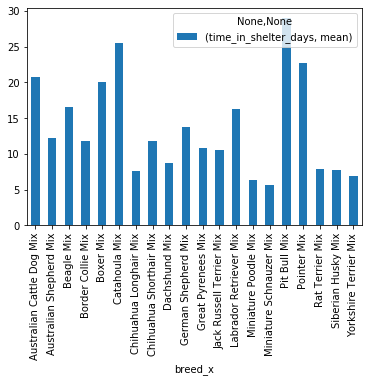

In [35]:
agg1.plot.bar()
plt.savefig('time_in_shelterbreed.png')

In [69]:
age_bins = [0, 1.5, 6, 25]
group_names = ["Puppy (<1.5)", "Adult (1.5 - 6)", "Senior (>6)"]

In [70]:
df4['age_group'] = pd.cut(df4['age_upon_outcome_(years)'],age_bins,labels = group_names)

In [38]:
df4.rename({
    'breed_x':'breed',
    'found_location_x':'found_location'
},inplace= True)

In [39]:
gb2 = df4.groupby('age_group')

In [40]:
agg2 = gb2.agg({
    'time_in_shelter_days':['mean']
})

In [41]:
agg2.head()

,time_in_shelter_days
,mean
age_group,
Puppy (<1.5),13.823366
Adult (1.5 - 6),20.950485
Senior (>6),21.003433


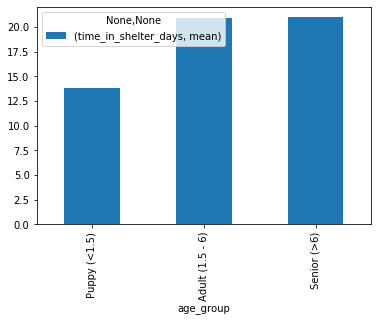

In [42]:
agg2.plot.bar()
plt.savefig('timeinshelterage.png')

In [43]:
df4['outcome_type'].value_counts()

Adoption           19944
Return to Owner    14467
Transfer            7692
Euthanasia          1277
Rto-Adopt            174
Died                 104
Missing               27
Disposal               7
Name: outcome_type, dtype: int64

In [71]:
gb3 = df4.groupby(['outcome_type','age_group'])
agg3 = gb3.agg({
    'age_group':['count']
})

In [72]:
agg3.head()

age_group
                                     count
outcome_type     age_group                
Negative Outcome Puppy (<1.5)          412
                 Adult (1.5 - 6)       709
                 Senior (>6)           292
Positive Outcome Puppy (<1.5)        16220
                 Adult (1.5 - 6)     14653

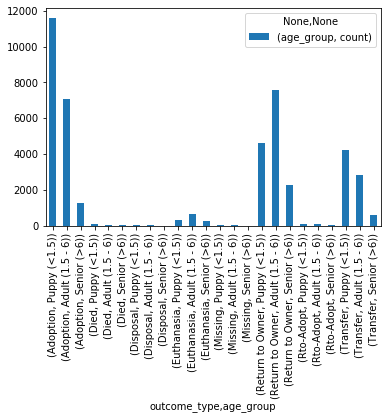

In [46]:
agg3.plot.bar()
plt.savefig('outcomebyage.png')

In [91]:
gb4 = df4.groupby(['outcome_type','breed_x'])
agg4 = gb4.agg({
    'breed_x':['count']
})
agg4.columns = agg4.columns.droplevel()
this = agg4[]

MultiIndex(levels=[['Negative Outcome', 'Positive Outcome', 'Rto-Adopt', 'Transfer'], ['Australian Cattle Dog Mix', 'Australian Shepherd Mix', 'Beagle Mix', 'Border Collie Mix', 'Boxer Mix', 'Catahoula Mix', 'Chihuahua Longhair Mix', 'Chihuahua Shorthair Mix', 'Dachshund Mix', 'German Shepherd Mix', 'Great Pyrenees Mix', 'Jack Russell Terrier Mix', 'Labrador Retriever Mix', 'Miniature Poodle Mix', 'Miniature Schnauzer Mix', 'Pit Bull Mix', 'Pointer Mix', 'Rat Terrier Mix', 'Siberian Husky Mix', 'Yorkshire Terrier Mix']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2,

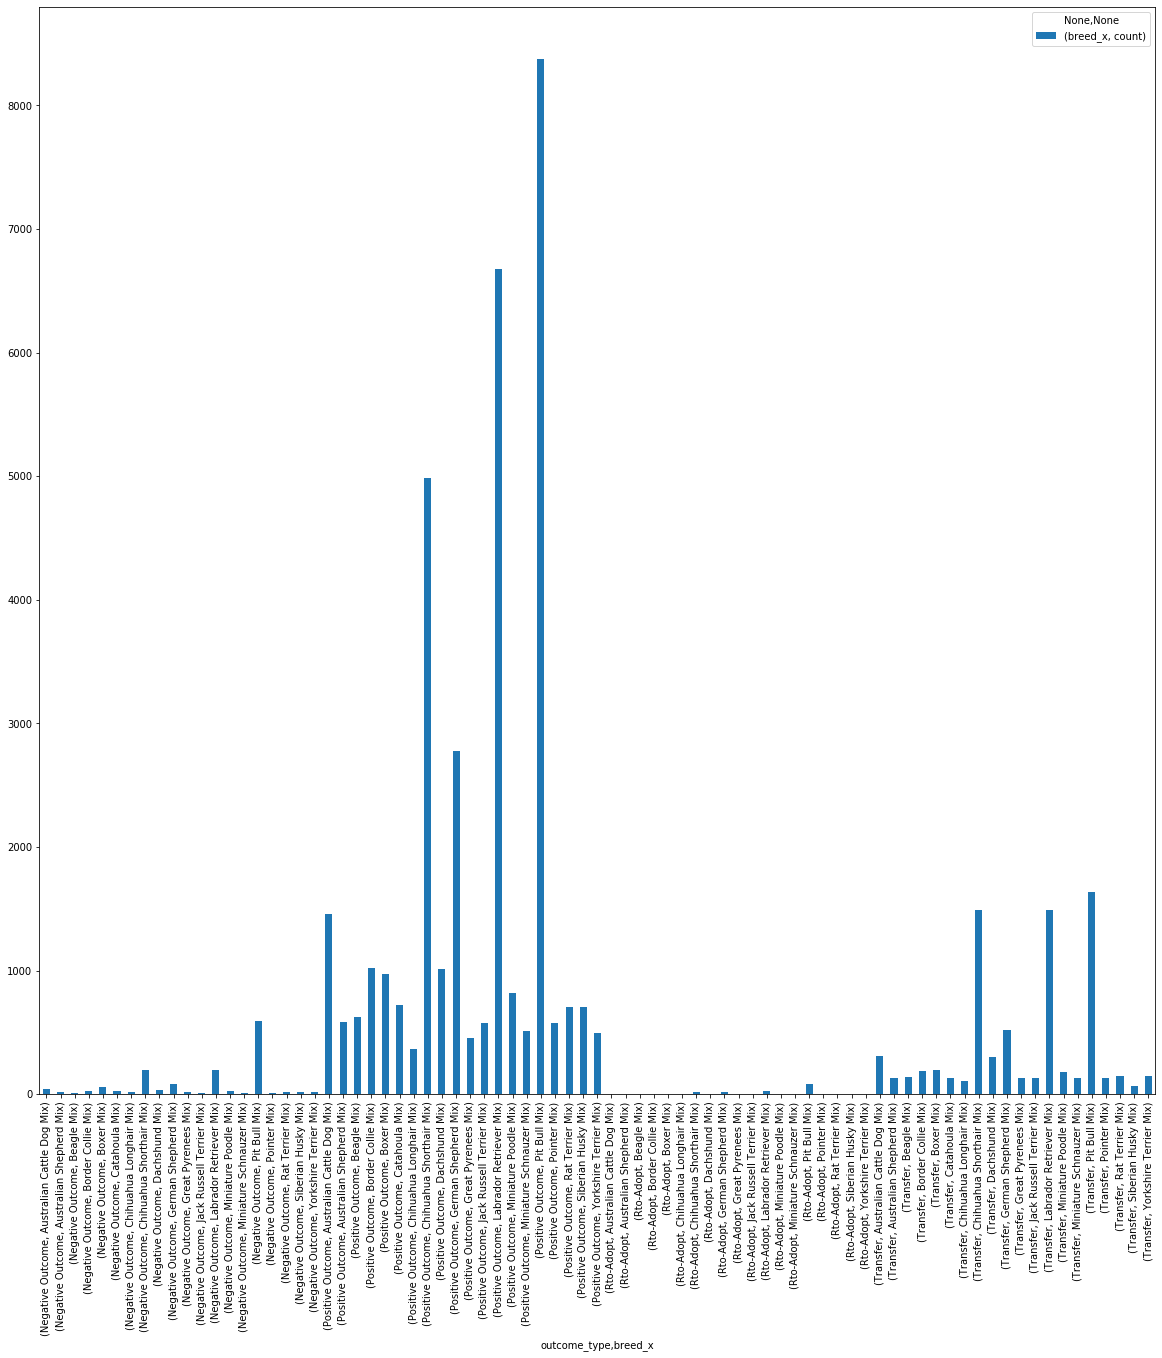

In [78]:
agg4.plot.bar(figsize=(20,20))
plt.savefig('outcomebybreed.png')

In [49]:
i_df['found_location'].value_counts()

Austin (TX)                                                   14443
Outside Jurisdiction                                            948
Travis (TX)                                                     921
7201 Levander Loop in Austin (TX)                               517
Del Valle (TX)                                                  411
Pflugerville (TX)                                               372
Manor (TX)                                                      280
4434 Frontier Trl in Austin (TX)                                163
124 W Anderson Ln in Austin (TX)                                153
Leander (TX)                                                    113
12034 Research Blvd in Austin (TX)                               98
1156 W Cesar Chavez in Austin (TX)                               98
12034 Research in Austin (TX)                                    96
1834 Ferguson in Austin (TX)                                     90
1156 W Cesar Chavez St in Austin (TX)           

In [50]:
def get_city_out(i):
    j = i.split(' ')
    if len(j) > 3:
        return True
    else:
        return False
    

In [51]:
is_address = dogs['found_location'].apply(get_city_out)

In [52]:
thing = dogs.loc[is_address]

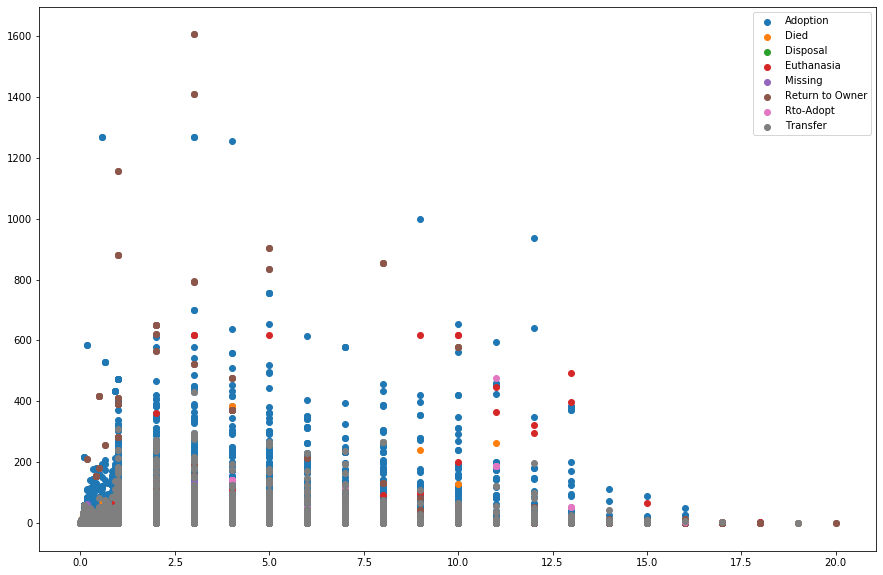

In [53]:
gb5 = df4.groupby('outcome_type')

fig, ax = plt.subplots(figsize=(15,10))

for name,group in gb5:
    ax.scatter(group['age_upon_outcome_(years)'],group['time_in_shelter_days'],label=name)
ax.legend()

fig.savefig('20scatter.png')